# Cloning the repository

## Generate SSH

The code of the last cell needs to be added to the github account (settings -> SSH and GPG Keys -> New SSH Key)

In [ ]:
!ssh-keygen -t rsa -b 4096

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

In [ ]:
!cat /root/.ssh/id_rsa.pub

## Clone and enter the repository

In [4]:
!git clone git@github.com:robert-abc/KTC2023-ABC2.git --branch main

Cloning into 'KTC2023-ABC2'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 84 (delta 28), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (84/84), 989.00 KiB | 3.29 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [5]:
%cd KTC2023-ABC2

/content/KTC2023-ABC2


# Install torch metrics

In [23]:
%%capture
!pip install torchmetrics

In [24]:
import numpy as np
import matplotlib
import scipy as sp
import torch
import PIL
import torchmetrics

In [25]:
torchmetrics.__version__

'1.2.0'

# Generate the results

In [26]:
!python main.py inputs outputs 1

4 images were found.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


# Visualize the results



In [27]:
import os
import re

import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

In [28]:
gt_name=os.listdir('groundTruths')
out_name=os.listdir('outputs')

r=re.compile(".*mat|.*png")

gt_name=list(filter(r.match,gt_name))
out_name=list(filter(r.match,out_name))

gt_name.sort()
out_name.sort()

In [29]:
img_list=[]

for i in range(len(gt_name)):
  ground = sp.io.loadmat(os.path.join('groundTruths', gt_name[i]))
  ground = ground['truth']
  output = Image.open(os.path.join('outputs', out_name[i]))

  img_list.append([ground,output])

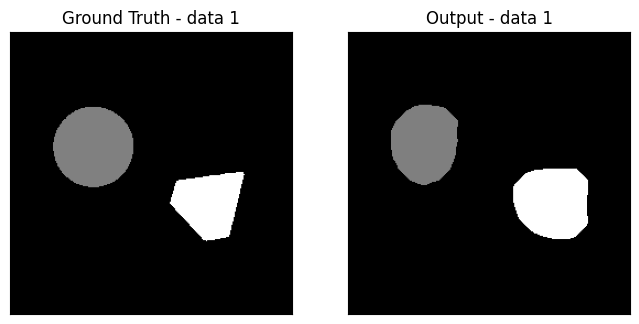

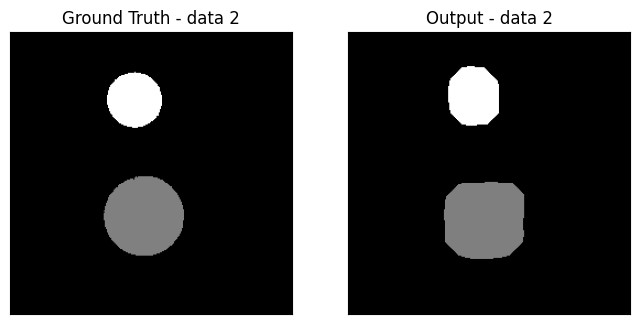

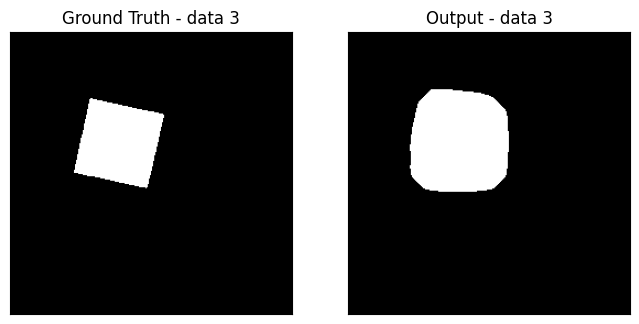

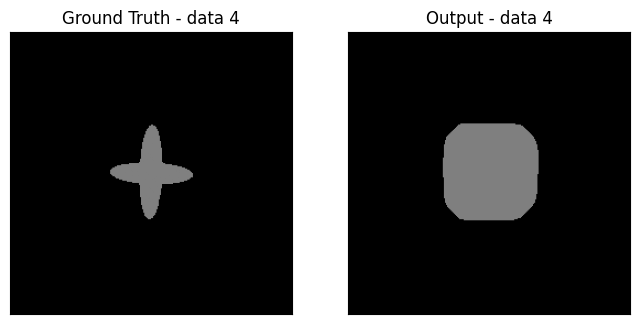

In [30]:
for i in range(4):
  plt.figure(figsize=[8,4])
  plt.subplot(1,2,1)
  plt.imshow(img_list[i][0], cmap='gray', vmin=0, vmax=2)
  plt.xticks([])
  plt.yticks([])
  plt.title(f"Ground Truth - data {i+1}")

  plt.subplot(1,2,2)
  plt.imshow(img_list[i][1], cmap='gray', vmin=0, vmax=255)
  plt.xticks([])
  plt.yticks([])
  plt.title(f"Output - data {i+1}")

  plt.show()